# Daten klassifizieren

**Inhalt:** Unsaubere Daten laden und klassifizieren

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Daten auf Integrität prüfen
- Einfaches Putzen der gröbsten Fehler
- Daten klassifizieren, auf die schnelle und saubere Art
- Plotting Level 2: mehrere Serien

# Das Beispiel

P3-Datenbank des Schweizerischen Nationalfonds. Beinhaltet alle Forschungsprojekte, die seit 1975 vom SNF Fördergelder erhalten haben.

Quelle und Dokumentation: http://p3.snf.ch/Pages/DataAndDocumentation.aspx

Datenfile: http://p3.snf.ch/P3Export/P3_GrantExport.csv

Speichern Sie die Datei an einem geeigneten Ort, zB im Unterornder `dataprojects/SNF/`

## Vorbereitung

Wir laden diesmal nicht nur das Pandas-Modul, sondern auch NumPy.

*NumPy is the fundamental package for scientific computing with Python): http://www.numpy.org/*

In [1]:
import pandas as pd

In [2]:
import numpy as np

## Datenfile laden

Wie gehabt ... Achtung, die Felder sind nicht durch Kommas sondern durch Semikolon abgetrennt!

In [3]:
path = "dataprojects/SNF/P3_GrantExport.csv"

In [4]:
df = pd.read_csv(path, delimiter=';')

In [5]:
df.head(2)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,FPSE Université de Genève,Switzerland,University of Geneva - GE,10104,"Education and learning sciences, subject-speci...","Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN


Besser! Schauen wir uns die Sache mal näher an.

In [6]:
df.shape

(77007, 18)

In [7]:
df.dtypes

Project Number                   int64
Project Number String           object
Project Title                   object
Project Title English           object
Responsible Applicant           object
Funding Instrument              object
Funding Instrument Hierarchy    object
Institution                     object
Institution Country             object
University                      object
Discipline Number                int64
Discipline Name                 object
Discipline Name Hierarchy       object
All disciplines                 object
Start Date                      object
End Date                        object
Approved Amount                 object
Keywords                        object
dtype: object

In [8]:
df.describe()

,Project Number,Discipline Number
count,77007.000000,77007.000000
mean,101279.005168,19862.502214
std,61110.964461,8300.058207
min,1.000000,0.000000
25%,43311.500000,10303.000000
50%,114366.000000,20404.000000
75%,152807.500000,30103.000000
max,206994.000000,50000.000000


Offensichtlich hat es einige Spalten drin, die noch nicht mit dem richtigen Datentyp formatiert sind, z.B. "Approved Amount".

Das Problem ist: So lange wir da nicht die richtigen Datentypen haben, funktionieren einige Auswertungen nicht.

In [9]:
#Zum Beispiel diese hier:
#df['Approved Amount'].mean()

Eigentlich wären das sehr interessante Informationen: wie viel Geld haben die Projekte im Schnitt gekriegt, im Maximum, im Minimum, etc.

## Entfernen von ungültigen Werten

Wir müssen also irgendwie diese Spalte reinigen, damit Pandas die Berechungen für uns machen kann.

Um herauszukriegen, was das Problem sein könnte, ist `value_counts()` eine ziemlich einfache Option.

In [10]:
df['Approved Amount'].value_counts().sort_index()

0.00                          89
100.00                         1
1000.00                       33
10000.00                     659
100000.00                    262
                           ...  
99996.00                       1
999976.00                      1
99998.00                       2
99999.00                       1
data not included in P3    13703
Name: Approved Amount, Length: 42960, dtype: int64

Das Problem liegt in der letzten Zeile: Bei 12070 Einträgen steht: "`data not included in P3`."

Wir können das lösen, indem wir die Daten nochmals einlesen. Und zwar mit einer Option. Sie heisst `na_values=` (na = Not Available, wird durch NaN ersetzt = Not a Number oder so)

In [17]:
df = pd.read_csv(path, delimiter=';', na_values='data not included in P3')

Tadaaa!

In [18]:
df.dtypes

Project Number                    int64
Project Number String            object
Project Title                    object
Project Title English            object
Responsible Applicant            object
Funding Instrument               object
Funding Instrument Hierarchy     object
Institution                      object
Institution Country              object
University                       object
Discipline Number                 int64
Discipline Name                  object
Discipline Name Hierarchy        object
All disciplines                  object
Start Date                       object
End Date                         object
Approved Amount                 float64
Keywords                         object
dtype: object

**Übrigens:** Um zu checken, was es eigentlich mit den ungültigen Einträgen eigentlich auf sich hat, können wir `.isnull()` verwenden:

In [19]:
df[df['Approved Amount'].isnull()]

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
9210,20001,81AM-020001,Therapie beim Morbus Hodgkin.,NaN,Wernli Martin,Fellowships for prospective researchers,Careers;Fellowships,UNI: Cancer Research Center University of Ch i...,United States of America,Institution abroad - IACH,30703,Clinical Cancer Research,Biology and Medicine;Clinical Medicine,30703,01.11.1986,31.10.1987,NaN,NaN
9211,20002,81AM-020002,Immunologie des Typ-1 Diabetes.,NaN,Atar Dan,Fellowships for prospective researchers,Careers;Fellowships,UNI: Hagedorn Research Laboratory Steno Memo r...,Denmark,Institution abroad - IACH,30403,"Immunology, Immunopathology",Biology and Medicine;Experimental Medicine,30403,01.01.1987,31.12.1987,NaN,NaN
9212,20003,81AM-020003,Infektionen bei Immunsuppression.,NaN,Ruef Christian,Fellowships for prospective researchers,Careers;Fellowships,UNI: Yale Univ Dept of Internal Medicineory Ne...,United States of America,Institution abroad - IACH,30701,Internal Medicine,Biology and Medicine;Clinical Medicine,30701,01.07.1987,30.06.1988,NaN,NaN
9213,20004,81AT-020004,'Modern and Applied Optics'.,NaN,Kellenberger Regula,Fellowships for prospective researchers,Careers;Fellowships,UNI: University of Reading Reading/ GB,Great Britain and Northern Ireland,Institution abroad - IACH,20508,Microelectronics. Optoelectronics,"Mathematics, Natural- and Engineering Sciences...",20508,01.09.1986,31.08.1987,NaN,NaN
9214,20005,81AT-020005,Traitement digital du signal et architecture d...,NaN,Piot Julien,Fellowships for prospective researchers,Careers;Fellowships,UNI: Massachusetts USA,United States of America,Institution abroad - IACH,20504,Electrical Engineering,"Mathematics, Natural- and Engineering Sciences...",20504,01.09.1986,31.08.1987,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76895,203222,P500PT_203222,End-to-end reconfigurable flat optics design s...,End-to-end reconfigurable flat optics design s...,Martin-Monier Louis,Postdoc.Mobility,Careers;Fellowships,Laboratoire des fibres et matériaux photonique...,Switzerland,NaN,20508,Microelectronics. Optoelectronics,"Mathematics, Natural- and Engineering Sciences...",20508/20505,01.09.2021,28.02.2023,NaN,Active Metamaterials; Phase Change Materials; ...
76896,203230,P500PT_203230,Chaos Backwards: From Limited Measurements to ...,NaN,Toedtli Simon,Postdoc.Mobility,Careers;Fellowships,Dept. of Mechanical Engineering Johns Hopkins ...,United States of America,NaN,20503,Fluid Dynamics,"Mathematics, Natural- and Engineering Sciences...",20503,01.09.2021,31.08.2023,NaN,direct numerical simulation; data assimilation...
76898,203253,P500PT_203253,Towards Improving Longstanding Combinatorial P...,NaN,Nassajianmojarrad Seyed Hossein,Postdoc.Mobility,Careers;Fellowships,Department of Mathematics Princeton University,United States of America,NaN,20100,Mathematics,"Mathematics, Natural- and Engineering Sciences",20100,01.08.2021,31.01.2023,NaN,extremal combinatorics; incidence geometry; ro...
77004,206237,P1BEP1_206237,Demarcation of Human Life: Moral Lines of Divi...,NaN,Yesil Ilay Zehra,Doc.Mobility,Careers;Fellowships,Institut für Politikwissenschaft LMU München,Germany,Institution abroad - IACH,10201,Sociology,"Humanities and Social Sciences;Sociology, soci...",10201,01.09.2021,28.02.2022,NaN,assisted dying; moral and ethical debate; Swit...


Es scheint sich also hier um ein spezielles Förderinstrument zu handeln ("Fellowships").

### Etwas Repetition vom Tag 1...

**Quiz:** Was war der maximale Betrag, den ein Projekt erhielt? Das Minimum? Der Median?

In [20]:
#Antwort
df['Approved Amount'].max()

32800000.0

In [21]:
#Antwort
df['Approved Amount'].min()

0.0

In [22]:
#Antwort
df['Approved Amount'].median()

181547.0

**Quiz:** Suche die fünfzig Projekte raus, die am meisten Geld gekriegt haben. Welche Universitäten kommen darunter am meisten vor?

In [23]:
#Antwort
df.sort_values('Approved Amount', ascending=False).head(50)['University'].value_counts()

ETH Zurich - ETHZ                                          10
EPF Lausanne - EPFL                                         8
University of Geneva - GE                                   8
University of Berne - BE                                    6
University of Basel - BS                                    5
University of Zurich - ZH                                   3
Swiss Centre of Expertise in the Social Sciences - FORS     3
University of Lausanne - LA                                 3
University of Neuchatel - NE                                2
University of Fribourg - FR                                 2
Name: University, dtype: int64

**Quiz:** Stellen Sie die Verteilung sämtlicher gesprochenen Beträge in einem Histogramm dar!

<AxesSubplot:>

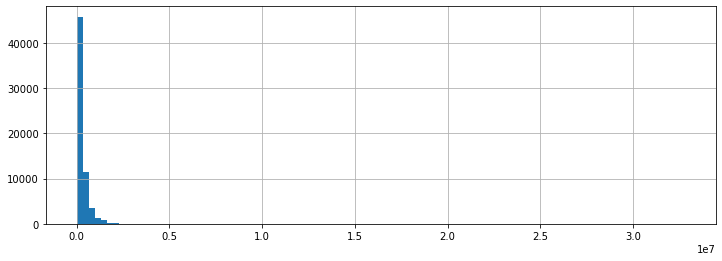

In [24]:
#Antwort
df['Approved Amount'].astype(float).hist(bins=100, figsize=(12,4))

**Quiz:** In welchen Ländern waren die vergebenen Beträge im Schnitt am Grössten? Zeigen Sie die zehn obersten an.

In [25]:
#Antwort
df.groupby('Institution Country')['Approved Amount'].mean().sort_values(ascending=False).head(10)

Institution Country
Portugal       703000.000000
Austria        416702.000312
Switzerland    316738.157168
Norway         294984.000000
Singapore      251470.000000
Ireland        245219.650000
Germany        207069.818633
Belgium        157181.408000
Denmark        148669.570000
Spain          142438.250000
Name: Approved Amount, dtype: float64

In [26]:
# Time for a break ...

## Werte Kategorisieren

Unser Ziel in dieser Sektion: Wir wollen verschiedene *Typen* von Institutionen unterscheiden und auswerten.

Wir beschränken uns der Einfachheit halter auf die Institutionen in der Schweiz, die vom SNF Geld gekriegt haben.

Wir erstellen erstmal ein Dataframe, in dem nur diese Institutionen vorkommen:

(Wir nutzen hier `copy()`, um nicht nur auf einer Referenz, sondern auf einer Kopie zu arbeiten...)

In [27]:
df_swiss = df[df['Institution Country'] == 'Switzerland'].copy()

Um die Unis nun zu klassifizieren, brauchen wir:
- ein neues Feld, das diese Information enthält ("Institution Type")
- eine Methode, wie wir dieses Feld anhand der restlichen Spalten füllen wollen.

Das neue Feld ist rasch erstellt:

In [28]:
df_swiss['Institution Type'] = ""

Bei der Methode wird es schon schwieriger... Wie vorgehen?

Als erstes lassen wir uns mal eine Liste aller Universitäten anzeigen, die in diesem Dataframe vorkommen:

In [29]:
df_swiss['University'].unique()

array(['University of Geneva - GE',
       'Non-profit organisations (libraries, museums, foundations) and administration - NPO',
       'University of Basel - BS', 'University of Fribourg - FR',
       'University of Zurich - ZH',
       'Swiss Federal Institute for Forest, Snow and Landscape Research  - WSL',
       'University of Berne - BE', 'ETH Zurich - ETHZ',
       'University of Lausanne - LA', 'University of Neuchatel - NE',
       'Graduate Institute of International and Development Studies - IHEID',
       'University of St.Gallen - SG',
       'Other Research Institutes - FINST',
       'Pädagogische Hochschule Graubünden - PHGR', 'EPF Lausanne - EPFL',
       'Pädagogische Hochschule Zürich - PHZH',
       'Companies/  Private Industry - FP', 'University of Lucerne - LU',
       'Unassignable - NA', 'Swiss Institute of Art Research - SIK-ISEA',
       'Dipartimento formazione e apprendimento, Scuola universitaria professionale della Svizzera italiana - SUPSI-DFA',
       

Schnell wird klar: In dieser Liste sind nicht nur Universitäten, sondern auch Fachhochschulen und andere Institutionen enthalten.

Können wir die Klassifizierung evtl danach vornehmen?

### Die Quick-Methode

Die allereinfachste (und nicht sehr empfehlenswerte) Variante ist, einfach zu checken, ob in einem bestimmten Eintrag das Wort "University" vorkommt:

- Falls die Institution z.B. "University of Zurich" heisst => "University"
- Falls die Institution z.B. "Pädagogische Hochschule" heisst => "Other"

Wir können für diesen Check die Funktion `str.contains()` verwenden.

Heraus kommt eine Liste von True/False-Werten, die wir weiter verwenden können...

In [30]:
df_swiss['University'].str.contains('University', na=False)

1         True
2        False
3         True
4        False
5         True
         ...  
76997     True
77000     True
77001     True
77003     True
77005     True
Name: University, Length: 56953, dtype: bool

Zum Beispiel als Filter - wir kriegen nun alle "University"-artigen Zeilen...

In [31]:
df_swiss[df_swiss['University'].str.contains('University', na=False)].head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,FPSE Université de Genève,Switzerland,University of Geneva - GE,10104,"Education and learning sciences, subject-speci...","Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,
5,8,1000-000008,Die schweizerische Wirtschaftspolitik seit dem...,NaN,Kleinewefers Henner,Project funding (Div. I-III),Project funding,"Séminaire de politique économique, d'économie ...",Switzerland,University of Fribourg - FR,10203,Economics,"Humanities and Social Sciences;Economics, law",10203,01.01.1976,31.12.1978,53009.0,NaN,


In dieser Zeilenauswahl können wir nun das Feld "Institution Type" auf "University" setzen.

Note: Wir verwenden die `.loc[...]`-Notation, weil Pandas das sonst nicht gerne hat.

In [32]:
df_swiss.loc[df_swiss['University'].str.contains('University', na=False), 'Institution Type'] = 'University'

In unserem Dataframe haben wir jetzt einige Einträge gefüllt...

In [33]:
df_swiss.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,FPSE Université de Genève,Switzerland,University of Geneva - GE,10104,"Education and learning sciences, subject-speci...","Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,University
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,University


Nun können wir in die restlichen (leeren) Zeilen was anderes reinschreiben, z.B. "Other"

In [34]:
df_swiss.loc[df_swiss['Institution Type'] == "", 'Institution Type'] = "Other"

In [35]:
df_swiss.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,FPSE Université de Genève,Switzerland,University of Geneva - GE,10104,"Education and learning sciences, subject-speci...","Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,University
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,Other
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,University


Wir können nun zB ausrechnen, wie viel Geld die Universitäten und die übrigen Institutionen in der Summe gekriegt haben:

In [36]:
df_swiss.groupby('Institution Type')['Approved Amount'].sum()

Institution Type
Other         5.707580e+09
University    1.227301e+10
Name: Approved Amount, dtype: float64

Aber wie gesagt, es gibt bessere Wege. (zB haben wir nun Einträge wie "Université" nicht berücksichtigt.

### Die ausführliche Methode

Und nun zur saubersten Art, wie man die Institutionen in dieser Tabelle hier klassifizieren sollte: von Hand.

Das heisst:
- Wir erstellen eine Liste aller Institute, die in der Schweiz vorkommen
- Wir exportieren diese Liste, um sie z.B. in Excel manuell zu kategorisieren
- Wir laden die manuell kategorisierte Liste zurück in Pandas
- Anahnd dieser Liste wird automatisch der Typ gematcht

Um zu starten, ziehen wir uns die Liste der unique Values, diesmal gleich als Dataframe:

In [37]:
df_unique = pd.DataFrame(df_swiss['University'].unique())
df_unique

,0
0,University of Geneva - GE
1,"Non-profit organisations (libraries, museums, ..."
2,University of Basel - BS
3,University of Fribourg - FR
4,University of Zurich - ZH
...,...
82,Facoltà di Teologia di Lugano - FTL
83,Swiss Distance University Institute - FUSC
84,Cardiocentro Ticino - CT
85,Fernfachhochschule Schweiz (member of SUPSI) -...


Weil es einfacher geht, bearbeiten wir die Liste in einem externen Programm... mit der Funktion `to_csv()`

In [38]:
df_unique.to_csv('dataprojects/SNF/klassifizieren.csv', index=False)

... im Excel, oder anderswo bearbeiten, und wieder laden: (Ich habe das hier schonmal vorbereitet)

In [39]:
df_unique_edited = pd.read_excel('dataprojects/SNF/klassifiziert_neu.xlsx')

In [40]:
df_unique_edited

,University,New Type
0,University of Geneva - GE,Universität
1,"Non-profit organisations (libraries, museums, ...",Other
2,University of Basel - BS,Universität
3,University of Fribourg - FR,Universität
4,University of Zurich - ZH,Universität
...,...,...
81,Facoltà di Teologia di Lugano - FTL,Other
82,Swiss Distance University Institute - FUSC,Other
83,Cardiocentro Ticino - CT,Other
84,Fernfachhochschule Schweiz (member of SUPSI) -...,Fachhochschule


Wir haben jetzt zwei Tabellen: `df_swiss` (die grosse Datentabelle) und `df_unique` (die Klassifizierungen).

**And now the magic happens...**

Diese zwei Tabellen können wir nun verknüpfen, und zwar mit der Funktion `merge()`

In [41]:
df_swiss_classified = df_swiss.merge(df_unique_edited, how='left', left_on='University', right_on='University')
df_swiss_classified

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,New Type
0,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,FPSE Université de Genève,Switzerland,University of Geneva - GE,10104,"Education and learning sciences, subject-speci...","Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,University,Universität
1,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,Other,Other
2,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,University,Universität
3,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.0,NaN,Other,Other
4,8,1000-000008,Die schweizerische Wirtschaftspolitik seit dem...,NaN,Kleinewefers Henner,Project funding (Div. I-III),Project funding,"Séminaire de politique économique, d'économie ...",Switzerland,University of Fribourg - FR,10203,Economics,"Humanities and Social Sciences;Economics, law",10203,01.01.1976,31.12.1978,53009.0,NaN,University,Universität
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56948,205957,10BP12_205957,Bildliche Narrativität - Erzählen mit Bildern....,Visual narrativity - telling stories with pict...,Rogner Frederik Arnd,Open Access Books,Science communication,Philosophisch-Historische Fakultät Dekanat Uni...,Switzerland,University of Basel - BS,10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.09.2021,28.02.2022,25000.0,Ägyptologie; Bildwissenschaft; Kunstgeschichte...,University,Universität
56949,206079,10BP12_206079,"Critical by Design? Genealogies, Practices, Po...","Critical by Design? Genealogies, Practices, Po...",Renner Michael,Open Access Books,Science communication,Institut Visuelle Kommunikation Hochschule für...,Switzerland,University of Applied Sciences and Arts Northw...,10603,Arts,"Humanities and Social Sciences;Art studies, mu...",10603,01.09.2021,28.02.2022,19027.0,Critical Design; Critical Theory; Material Cul...,University,Universität
56950,206126,10BP12_206126,Paul on the Human Vocation: Reason language in...,Paul on the Human Vocation: Reason language in...,Dürr Simon,Open Access Books,Science communication,Departement für Biblische Studien Universität ...,Switzerland,University of Fribourg - FR,10102,"Religious studies, Theology",Humanities and Social Sciences;Theology & reli...,10102/10101,01.09.2021,28.02.2022,12444.0,Pauline Anthropology; Paul; Epictetus; Paul in...,University,Universität
56951,206200,10BP12_206200,From Exception to Promotion. Re-Thinking the R...,From Exception to Promotion. Re-Thinking the R...,Cima Elena,Open Access Books,Science communication,Institute for Environmental Sciences Universit...,Switzerland,University of Geneva - GE,10205,Legal sciences,"Humanities and Socia

Die Spalte "New Type" wurde nun zur Tabelle "df_swiss" hinzugefügt, und zwar genau dort, wo es zum Eintrag in "University" passt!

Schauen wir kurz, wie viele Einträge es von welchem Typ hat:

In [42]:
df_swiss_classified['New Type'].value_counts()

Universität       50599
Other              4967
Fachhochschule     1199
Spital              185
Name: New Type, dtype: int64

Ging auch wirklich nichts vergessen?

In [43]:
df_swiss_classified['New Type'].value_counts(dropna=False)

Universität       50599
Other              4967
Fachhochschule     1199
Spital              185
NaN                   3
Name: New Type, dtype: int64

**Oops!** Es hat einen fehlenden Eintrag drin.

Was ist das für ein Eintrag?

In [44]:
df_swiss_classified[df_swiss_classified['New Type'].isnull()]

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,New Type
24178,101005,50CH40-101005,SELECTS 2003: Eidgenössische Wahlen 2003,SELECTS 2003: Federal elections 2003,Malaguerra Carlo,Swiss Priority Programmes (SPPs),Programmes,Schweizerische Akademie der Geistes-und Sozial...,Switzerland,NaN,10202,Political science,"Humanities and Social Sciences;Sociology, soci...",10202,01.02.2003,31.01.2004,100000.0,NaN,Other,NaN
50721,177868,P3P3PA_177868,Predicting the genetic adaptations that confer...,NaN,Hausser Jean,Return CH Advanced Postdoc.Mobility,Careers;Fellowships,Ludwig Institute for Cancer Research,Switzerland,NaN,30102,Molecular Biology,Biology and Medicine;Basic Biological Research,30102/30401,01.06.2018,28.02.2019,80202.0,intra-tumor heterogeneity; multi-task evolutio...,Other,NaN
56861,203222,P500PT_203222,End-to-end reconfigurable flat optics design s...,End-to-end reconfigurable flat optics design s...,Martin-Monier Louis,Postdoc.Mobility,Careers;Fellowships,Laboratoire des fibres et matériaux photonique...,Switzerland,NaN,20508,Microelectronics. Optoelectronics,"Mathematics, Natural- and Engineering Sciences...",20508/20505,01.09.2021,28.02.2023,NaN,Active Metamaterials; Phase Change Materials; ...,Other,NaN


Sieht nach einem grundsätzlich validen Projekt aus. Wir klassifizieren diesen Eintrag kurzerhand auf "Other":

In [45]:
df_swiss_classified.loc[df_swiss_classified['New Type'].isnull(), "New Type"] = "Other"

In [46]:
df_swiss_classified.loc[24178]

Project Number                                                             101005
Project Number String                                               50CH40-101005
Project Title                            SELECTS 2003: Eidgenössische Wahlen 2003
Project Title English                        SELECTS 2003: Federal elections 2003
Responsible Applicant                                            Malaguerra Carlo
Funding Instrument                               Swiss Priority Programmes (SPPs)
Funding Instrument Hierarchy                                           Programmes
Institution                     Schweizerische Akademie der Geistes-und Sozial...
Institution Country                                                   Switzerland
University                                                                    NaN
Discipline Number                                                           10202
Discipline Name                                                 Political science
Discipline Name 

Wir können nun wiederum unsere Auswertung vornehmen,zB nach Durchschnittsbeträgen:

In [47]:
df_swiss_classified.groupby('New Type')['Approved Amount'].sum()

New Type
Fachhochschule    2.474094e+08
Other             1.337274e+09
Spital            4.669929e+07
Universität       1.634921e+10
Name: Approved Amount, dtype: float64

## Plotting Level 2

Nun wollen wir darstellen, wie sich die Projekte über die Zeit hinweg in der Schweiz und in den übrigen Ländern entwickelt haben. Es geht also darum, zwei verschiedene Serien auf einer Grafik einzuzeichnen.

- für den Ländertyp basteln wir uns rasch eine ähnliche Kategorisierung wie vorher:

In [48]:
df['Country Type'] = ""
df.loc[df['Institution Country'] == 'Switzerland', 'Country Type'] = "Switzerland"
df.loc[df['Institution Country'] != 'Switzerland', 'Country Type'] = "Other"
df['Country Type'].value_counts(dropna=False)

Switzerland    56953
Other          20054
Name: Country Type, dtype: int64

- für das Jahr wenden wirr jetzt einen etwas faulen Trick an, um eine neue Spalte mit dem Jahr zu generieren (eigentlich gäbe es dazu noch einen speziellen Datentyp, aber den schauen wir ein anderes Mal an).

In [49]:
df['Year'] = df['Start Date'].str[6:]

Check, ob das einigermassen funktioniert hat...

In [50]:
df['Year'].value_counts(dropna=False).sort_index().head(5)

1975    205
1976    542
1977    564
1978    556
1979    616
Name: Year, dtype: int64

In [51]:
df['Year'].value_counts(dropna=False).sort_index().tail(5)

2019    2645
2020    2401
2021    1708
2022      19
NaN        2
Name: Year, dtype: int64

Jetzt plotten wir die Gesamtsumme der gesprochenen Gelder nach Jahr (nur bis 2021).

Zuerst für die Schweiz ...

<AxesSubplot:xlabel='Year'>

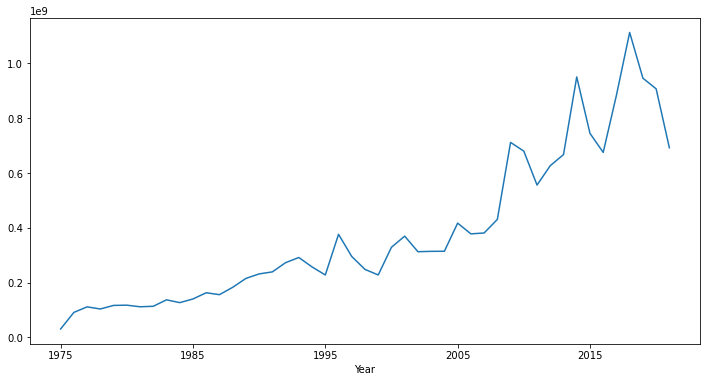

In [52]:
df[(df['Country Type'] == "Switzerland") & (df['Year'] != '2022')].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

... dann für die anderen Länder ...

<AxesSubplot:xlabel='Year'>

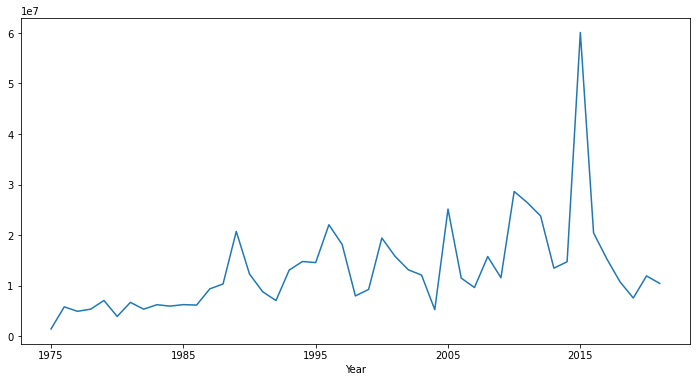

In [53]:
df[(df['Country Type'] == "Other") & (df['Year'] != '2022')].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

... und schliesslich für beide Ländertypen:

### Methode 1: Zwei verschiedene Linien einzeichnen

Die sicherste Methode, um mehrere Kurven auf derselben Grafik darzustellen, ist `ax=`.

Wir speichern erste einen Plot als "chart1" und sagen dem zweiten Plot dann, sich zu "chart1" hinzuzugesellen.

<AxesSubplot:xlabel='Year'>

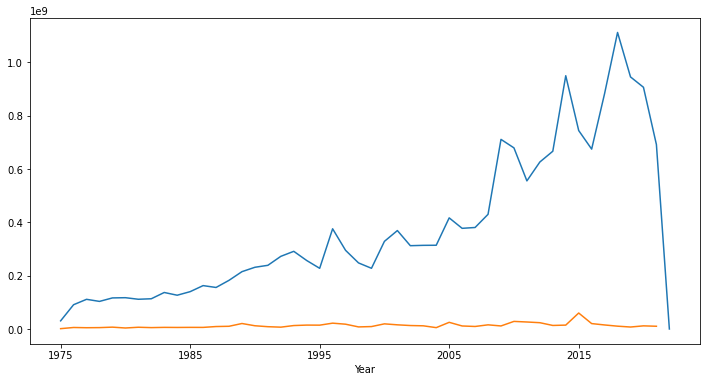

In [54]:
chart1 = df[df['Country Type'] == "Switzerland"].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

df[df['Country Type'] == "Other"].groupby('Year')['Approved Amount'].sum().plot(ax=chart1)

### Methode 2: Doppelt groupby, unstack

In diesem Fall gibt es allerdings noch eine elegantere Variante. Und zwar mit `groupby()`.

Diese Methode funktioniert nicht nur mit einem Level, sondern auch mit zwei. Die Summierung wird einerseits über die Jahre ("Years") gemacht und andererseits für die einzelenen Ländertypen ("Country Types"):

In [55]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum()

Year  Country Type
1975  Other           1.422727e+06
      Switzerland     3.074641e+07
1976  Other           5.798550e+06
      Switzerland     9.121748e+07
1977  Other           4.920319e+06
                          ...     
2020  Other           1.191692e+07
      Switzerland     9.069372e+08
2021  Other           1.043250e+07
      Switzerland     6.919536e+08
2022  Switzerland     2.243400e+05
Name: Approved Amount, Length: 95, dtype: float64

Um diese Werte zu plotten, müssen wir Pandas die Tabelle allerdings etwas anders zur Verfügung stellen: im Wide-Format (dazu später noch mehr). Wir können dazu die Funktion `unstack()` verwenden:

In [56]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum().unstack()

Country Type,Other,Switzerland
Year,,
1975,1422727.00,3.074641e+07
1976,5798550.00,9.121748e+07
1977,4920319.00,1.114744e+08
1978,5344733.00,1.036575e+08
1979,7064763.00,1.167330e+08
1980,3904041.00,1.175633e+08
1981,6689602.00,1.116979e+08
1982,5339538.00,1.135752e+08
1983,6220266.00,1.370960e+08


Letzter Schritt: `plot()`

<AxesSubplot:xlabel='Year'>

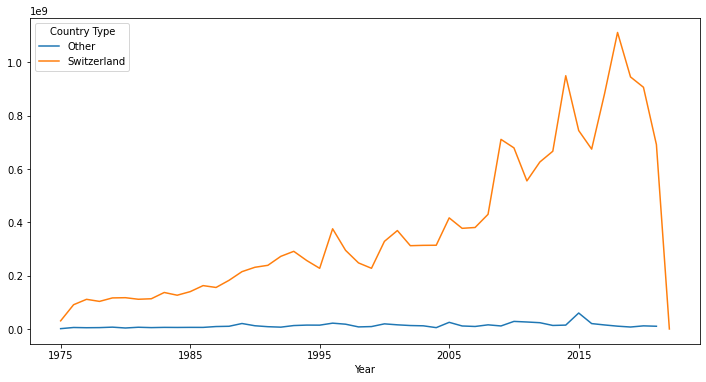

In [57]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum().unstack().plot(figsize=(12,6))

**Quiz:** Plotten Sie den durchschnittlichen Betrag, den Universitäten, Fachhochschulen, Spitäler und andere Institutionen über die Jahre erhalten haben - alles auf derselben Grafik. Benutzen Sie dazu wieder das Dataframe "df_swiss_classfied" – Achtung, Sie müssen zuerst wieder eine Jahresspalte erstellen.

In [58]:
# Spalte 'Year' in df_swiss_classified erstellen
df_swiss_classified['Year'] = df_swiss_classified['Start Date'].str[6:]

In [59]:
# Liste, nach Jahr und New Type gruppiert
df_swiss_classified.groupby(['Year', 'New Type'])['Approved Amount'].mean()

Year  New Type   
1975  Other          174150.941176
      Spital          76234.750000
      Universität    161652.364706
1976  Other          230368.245283
      Spital          62150.000000
                         ...      
2021  Spital         346434.750000
      Universität    574244.233716
2022  Other            6400.000000
      Spital           9400.000000
      Universität     12267.058824
Name: Approved Amount, Length: 180, dtype: float64

In [ ]:
# Plot
df_swiss_classified.groupby(['Year', 'New Type'])['Approved Amount'].mean().unstack().plot(figsize=(12,6))

**Schlussfrage:** Haben wir nun bereits eine Story gefunden? Wenn ja, was könnte sie sein? Wenn nein, welches wären weitere Auswertungen, die man basierend auf diesen Daten machen könnte?

In [61]:
#Antwort in Textform...
#Zum Beispiel: Auswertung der Profile von einzelnen Forschern.

In [62]:
df['Responsible Applicant'].value_counts()

Güntherodt Hans-Joachim    47
Kneubühl Fritz             47
Pestalozzi Karl            46
Stocker Thomas             42
Günter Peter               41
                           ..
Vavylonis Dimitrios         1
Lau Markus                  1
Barbakadze Gocha            1
Koenig-Bruhin Monica        1
Cappello Giovanni           1
Name: Responsible Applicant, Length: 29401, dtype: int64

<AxesSubplot:xlabel='Year'>

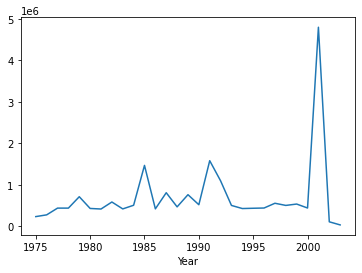

In [63]:
df[df['Responsible Applicant'] == 'Güntherodt Hans-Joachim'].groupby('Year')['Approved Amount'].sum().plot()

# Übung

Wir klassifizieren die Projekte nun nach Forschungsdisziplin und werten aus, welche Disziplinen zu welchem Zeitpunkt wie viel Geld gekriegt haben (wir wenden also Methode 3 an).

**Schritt 1:** Wir erstellen eine Liste der einzigartigen Einträge im Datenfeld "Discipline Name" und speichern sie als csv-Datei ab. (Arbeiten Sie mit dem dataframe "df_swiss")

In [64]:
#Dataframe aus einzigartigen Disziplinennamen erstellen
df_disciplines = pd.DataFrame(df_swiss['Discipline Name'].unique())
df_disciplines

,0
0,"Education and learning sciences, subject-speci..."
1,Philosophy
2,Swiss history
3,Ancient history and Classical studies
4,Economics
...,...
153,"Music, Theatre"
154,Arts
155,Applied psychology
156,Applied linguistics


In [65]:
# Dataframe als csv speichern
df_disciplines.to_csv('dataprojects/SNF/disziplinen.csv', index=False)

**Schritt 2:** Wir bearbeiten das csv-File extern und klassifizieren nach unserer Wahl

In [66]:
#extern bearbeiten...

**Schritt 3:** Wir fügen die Klassifizierung der Disziplinen in unsere Datenliste (Arbeiten Sie mit df) ein

In [67]:
# Einlesen des bearbeiteten csv-Files
df_disciplines_classified = pd.read_csv('dataprojects/SNF/disziplinen-klassifiziert.csv')
df_disciplines_classified.head(3)

,Discipline Name,Discipline Type
0,Educational science and Pedagogy,Social Sciences
1,Philosophy,Social Sciences
2,Swiss history,Social Sciences


In [68]:
# Verbinden Sie das dataframe "df_swiss" mit der Klassifizierung, abspeichern unter neuem dataframe df_swiss_classified
df_swiss_classified = df_swiss.merge(df_disciplines_classified, how='inner', on='Discipline Name')
df_swiss_classified.head(2)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,Discipline Type
0,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,Other,Social Sciences
1,75,1000-000075,Internationales erkenntnistheoretisches Kolloq...,NaN,Lauener Henri,Project funding (Div. I-III),Project funding,Institut für Philosophie Universität Bern,Switzerland,University of Berne - BE,10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.01.1976,31.05.1976,14242.0,NaN,University,Social Sciences


**Schritt 4:** Auswertungen

- Wie viele Projekte von welchem Disziplinen-Typ wurden durchgeführt?

In [69]:
df_swiss_classified['Discipline Type'].value_counts()

Natural Sciences    22303
Medicine            16876
Social Sciences     16772
Name: Discipline Type, dtype: int64

- Welche Disziplinen-Typen haben meisten Geld gekriegt?

In [70]:
df_swiss_classified.groupby('Discipline Type')['Approved Amount'].sum()

Discipline Type
Medicine            6.660162e+09
Natural Sciences    7.178566e+09
Social Sciences     3.952067e+09
Name: Approved Amount, dtype: float64

- Wie viel kosten Projekte der Disziplinen-Typen im Durchschnitt? Im Median?

In [71]:
df_swiss_classified.groupby('Discipline Type')['Approved Amount'].mean()

Discipline Type
Medicine            395731.547886
Natural Sciences    322574.202530
Social Sciences     236906.055890
Name: Approved Amount, dtype: float64

In [72]:
df_swiss_classified.groupby('Discipline Type')['Approved Amount'].median()

Discipline Type
Medicine            273190.0
Natural Sciences    203426.5
Social Sciences     121837.5
Name: Approved Amount, dtype: float64

**Schritt 5:** Plot einer Auswertung

Wie viel Geld haben die verschiedenen Disziplinentypen im Jahresverlauf insgesamt gekriegt?

In [73]:
#Wir müssen auf df_swiss_classified nochmals den Trick mit der Jahresspalte anwenden
df_swiss_classified['Year'] = df_swiss_classified['Start Date'].str[6:]

In [74]:
# Tabelle anzeigen: Summe der gesprochenen Gelder, gruppiert nach Jahr und Disziplinentyp
df_swiss_classified.groupby(['Year', 'Discipline Type'])['Approved Amount'].sum().unstack()

Discipline Type,Medicine,Natural Sciences,Social Sciences
Year,,,
1975,1.277342e+07,1.283916e+07,4.402454e+06
1976,3.945418e+07,4.030315e+07,1.111321e+07
1977,4.146789e+07,5.275032e+07,1.641714e+07
1978,4.544383e+07,4.008860e+07,1.774524e+07
1979,4.164585e+07,5.435762e+07,1.926859e+07
1980,5.372031e+07,4.422708e+07,1.687742e+07
1981,4.363928e+07,4.803530e+07,1.945050e+07
1982,4.150669e+07,4.732691e+07,2.285548e+07
1983,4.869910e+07,6.506768e+07,2.122889e+07


<AxesSubplot:xlabel='Year'>

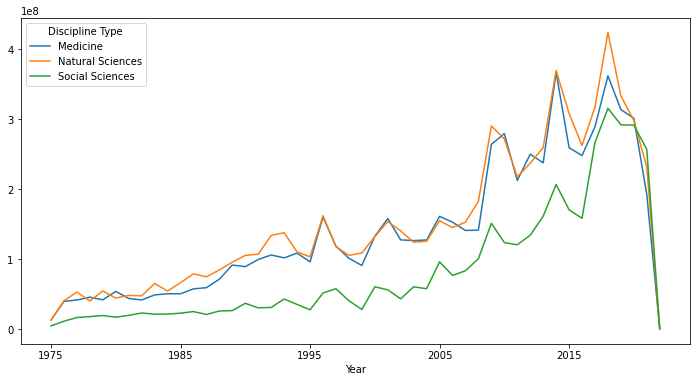

In [75]:
#Plot als Liniendiagramm
df_swiss_classified.groupby(['Year', 'Discipline Type'])['Approved Amount'].sum().unstack().plot(figsize=(12,6))